<a id='start'></a>
# Lezione 3 - Clustering e anomaly detection

In questo notebook viene spiegato cosa sono e come possiamo realizzare dei compiti di Clusterizzazione e Classificazione con Python. <br>
<br>
Il notebook è suddiviso nelle seguenti sezioni:<br>
- [Clusterizzazione](#section1)
- [K-means](#section10)
    - [Elbow method](#section11)
    - [The silhouette method](#section12)
    - [Scegliere il numero di cluster](#section13)
    - [Centroidi](#section14)
- [Hierarchical Clustering](#section20)
- [DB Scan](#section2)
- [Anomaly detection](#section3)

In statistica, il clustering o analisi dei gruppi (dal termine inglese cluster analysis introdotto da Robert Tryon nel 1939) è un insieme di tecniche di analisi multivariata dei dati volte alla selezione e raggruppamento di elementi omogenei in un insieme di dati. Le tecniche di clustering si basano su misure relative alla somiglianza tra gli elementi. In molti approcci questa similarità, o meglio, dissimilarità, è concepita in termini di distanza in uno spazio multidimensionale. La bontà delle analisi ottenute dagli algoritmi di clustering dipende molto dalla scelta della metrica, e quindi da come è calcolata la distanza. Gli algoritmi di clustering raggruppano gli elementi sulla base della loro distanza reciproca, e quindi l'appartenenza o meno ad un insieme dipende da quanto l'elemento preso in esame è distante dall'insieme stesso.

<img src="img/kmeans.png">

<a id='section10'></a>
## K-means

L'algoritmo K-means è un algoritmo di clustering partizionale che permette di suddividere un insieme di oggetti in K gruppi sulla base dei loro attributi. È una variante dell'algoritmo di aspettativa-massimizzazione (EM) il cui obiettivo è determinare i K gruppi di dati generati da distribuzioni gaussiane. Si assume che gli attributi degli oggetti possano essere rappresentati come vettori, e che quindi formino uno spazio vettoriale.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Carichiamo dei dati di alcune popolazioni di pesci:

In [50]:
data = pd.read_csv('data/fish.csv')
data

species  weight  length1  length2  length3  height  width
0    Bream   242.0     23.2     25.4     30.0    38.4   13.4
1    Bream   290.0     24.0     26.3     31.2    40.0   13.8
2    Bream   340.0     23.9     26.5     31.1    39.8   15.1
3    Bream   363.0     26.3     29.0     33.5    38.0   13.3
4    Bream   430.0     26.5     29.0     34.0    36.6   15.1
..     ...     ...      ...      ...      ...     ...    ...
63   Smelt    12.2     11.5     12.2     13.4    15.6   10.4
64   Smelt    13.4     11.7     12.4     13.5    18.0    9.4
65   Smelt    12.2     12.1     13.0     13.8    16.5    9.1
66   Smelt    19.7     13.2     14.3     15.2    18.9   13.6
67   Smelt    19.9     13.8     15.0     16.2    18.1   11.6

[68 rows x 7 columns]

In [51]:
data['species'].unique()

array(['Bream', 'Roach', 'Smelt'], dtype=object)

In [52]:
data['species'] = data['species'].map({ 'Bream': 0, 'Roach': 1, 'Smelt': 2 })
data

species  weight  length1  length2  length3  height  width
0         0   242.0     23.2     25.4     30.0    38.4   13.4
1         0   290.0     24.0     26.3     31.2    40.0   13.8
2         0   340.0     23.9     26.5     31.1    39.8   15.1
3         0   363.0     26.3     29.0     33.5    38.0   13.3
4         0   430.0     26.5     29.0     34.0    36.6   15.1
..      ...     ...      ...      ...      ...     ...    ...
63        2    12.2     11.5     12.2     13.4    15.6   10.4
64        2    13.4     11.7     12.4     13.5    18.0    9.4
65        2    12.2     12.1     13.0     13.8    16.5    9.1
66        2    19.7     13.2     14.3     15.2    18.9   13.6
67        2    19.9     13.8     15.0     16.2    18.1   11.6

[68 rows x 7 columns]

Proviamo a disegnare la popolazione dei pesci in base alla loro lunghezza e larghezza:

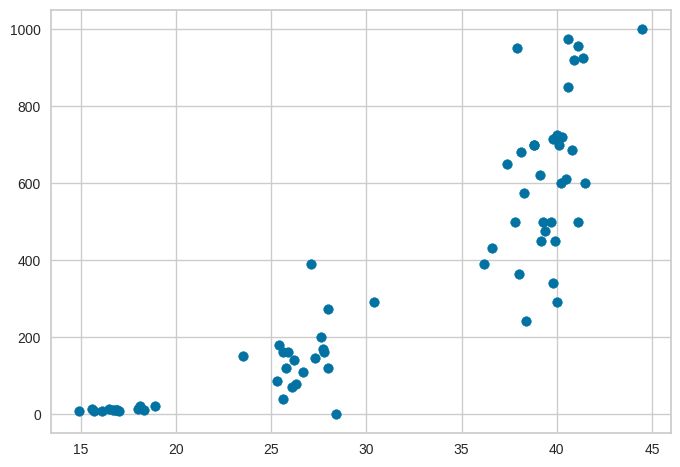

In [53]:
plt.scatter(data['height'], data['weight'])
plt.show()

Selezioniamo le features:

In [54]:
x = data[['weight', 'length1', 'length2', 'length3', 'height', 'width']]

Prima di proseguire standardizziamo i dati:

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(x)
data_scaled = pd.DataFrame(data_scaled, index=x.index, columns=x.columns)

Ora possiamo passare al compito di clusterizzazione:

In [56]:
from sklearn.cluster import KMeans
# Create an object (which we would call kmeans)
# The number in the brackets is K, or the number of clusters we are aiming for
kmeans = KMeans(3, n_init=10)
# Fit the input data, i.e. cluster the data in X in K clusters
kmeans.fit(data_scaled)

KMeans(n_clusters=3, n_init=10)

In [57]:
# Create a variable which will contain the predicted clusters for each observation
identified_clusters = kmeans.predict(data_scaled)
# Check the result
identified_clusters

array([2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [58]:
# Create a copy of the data
data_with_clusters = data.copy()
# Create a new Series, containing the identified cluster for each observation
data_with_clusters['Cluster'] = identified_clusters
# Check the result
data_with_clusters

species  weight  length1  length2  length3  height  width  Cluster
0         0   242.0     23.2     25.4     30.0    38.4   13.4        2
1         0   290.0     24.0     26.3     31.2    40.0   13.8        2
2         0   340.0     23.9     26.5     31.1    39.8   15.1        2
3         0   363.0     26.3     29.0     33.5    38.0   13.3        1
4         0   430.0     26.5     29.0     34.0    36.6   15.1        1
..      ...     ...      ...      ...      ...     ...    ...      ...
63        2    12.2     11.5     12.2     13.4    15.6   10.4        0
64        2    13.4     11.7     12.4     13.5    18.0    9.4        0
65        2    12.2     12.1     13.0     13.8    16.5    9.1        0
66        2    19.7     13.2     14.3     15.2    18.9   13.6        0
67        2    19.9     13.8     15.0     16.2    18.1   11.6        0

[68 rows x 8 columns]

In [59]:
data_with_clusters.loc[data_with_clusters['Cluster'] == 1]

species  weight  length1  length2  length3  height  width  Cluster
3         0   363.0     26.3     29.0     33.5    38.0   13.3        1
4         0   430.0     26.5     29.0     34.0    36.6   15.1        1
5         0   450.0     26.8     29.7     34.7    39.2   14.2        1
6         0   500.0     26.8     29.7     34.5    41.1   15.3        1
7         0   390.0     27.6     30.0     35.0    36.2   13.4        1
8         0   450.0     27.6     30.0     35.1    39.9   13.8        1
9         0   500.0     28.5     30.7     36.2    39.3   13.7        1
10        0   475.0     28.4     31.0     36.2    39.4   14.1        1
11        0   500.0     28.7     31.0     36.2    39.7   13.3        1
12        0   500.0     29.1     31.5     36.4    37.8   12.0        1
13        0   600.0     29.4     32.0     37.2    40.2   13.9        1
14        0   600.0     29.4     32.0     37.2    41.5   15.0        1
15        0   700.0     30.4     33.0     38.3    38.8   13.8        1
16        0   700.0     30.4     33.0     38.5    38.8   13.5        1
17        0   610.0     30.9     33.5     38.6    40.5   13.3        1
18        0   650.0     31.0     33.5     38.7    37.4   14.8        1
19        0   575.0     31.3     34.0     39.5    38.3   14.1        1
20        0   685.0     31.4     34.0     39.2    40.8   13.7        1
21        0   620.0     31.5     34.5     39.7    39.1   13.3        1
22        0   680.0     31.8     35.0     40.6    38.1   15.1        1
23        0   700.0     31.9     35.0     40.5    40.1   13.8        1
24        0   725.0     31.8     35.0     40.9    40.0   14.8        1
25        0   720.0     32.0     35.0     40.6    40.3   15.0        1
26        0   714.0     32.7     36.0     41.5    39.8   14.1        1
27        0   850.0     32.8     36.0     41.6    40.6   14.9        1
28        0  1000.0     33.5     37.0     42.6    44.5   15.5        1
29        0   920.0     35.0     38.5     44.1    40.9   14.3        1
30        0   955.0     35.0     38.5     44.0    41.1   14.3        1
31        0   925.0     36.2     39.5     45.3    41.4   14.9        1
32        0   975.0     37.4     41.0     45.9    40.6   14.7        1
33        0   950.0     38.0     41.0     46.5    37.9   13.7        1
53        1   390.0     29.5     31.7     35.0    27.1   15.3        1

In [60]:
data_with_clusters['Cluster'] = data_with_clusters['Cluster'].map({0: 1, 1: 2, 2: 0})
data_with_clusters

species  weight  length1  length2  length3  height  width  Cluster
0         0   242.0     23.2     25.4     30.0    38.4   13.4        0
1         0   290.0     24.0     26.3     31.2    40.0   13.8        0
2         0   340.0     23.9     26.5     31.1    39.8   15.1        0
3         0   363.0     26.3     29.0     33.5    38.0   13.3        2
4         0   430.0     26.5     29.0     34.0    36.6   15.1        2
..      ...     ...      ...      ...      ...     ...    ...      ...
63        2    12.2     11.5     12.2     13.4    15.6   10.4        1
64        2    13.4     11.7     12.4     13.5    18.0    9.4        1
65        2    12.2     12.1     13.0     13.8    16.5    9.1        1
66        2    19.7     13.2     14.3     15.2    18.9   13.6        1
67        2    19.9     13.8     15.0     16.2    18.1   11.6        1

[68 rows x 8 columns]

In [61]:
data_with_clusters.loc[data_with_clusters['Cluster'] != data_with_clusters['species']]

species  weight  length1  length2  length3  height  width  Cluster
3         0   363.0     26.3     29.0     33.5    38.0   13.3        2
4         0   430.0     26.5     29.0     34.0    36.6   15.1        2
5         0   450.0     26.8     29.7     34.7    39.2   14.2        2
6         0   500.0     26.8     29.7     34.5    41.1   15.3        2
7         0   390.0     27.6     30.0     35.0    36.2   13.4        2
..      ...     ...      ...      ...      ...     ...    ...      ...
63        2    12.2     11.5     12.2     13.4    15.6   10.4        1
64        2    13.4     11.7     12.4     13.5    18.0    9.4        1
65        2    12.2     12.1     13.0     13.8    16.5    9.1        1
66        2    19.7     13.2     14.3     15.2    18.9   13.6        1
67        2    19.9     13.8     15.0     16.2    18.1   11.6        1

[65 rows x 8 columns]

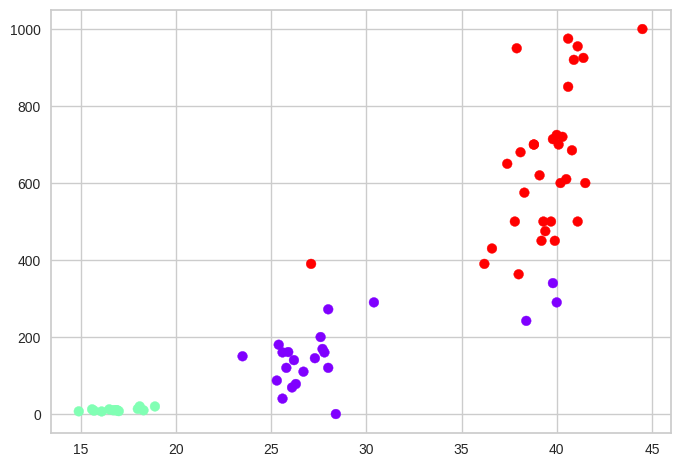

In [62]:
# Plot the data using the longitude and the latitude
# c (color) is an argument which could be coded with a variable 
# The variable in this case has values 0,1,2, indicating to plt.scatter, that there are three colors (0,1,2)
# All points in cluster 0 will be the same colour, all points in cluster 1 - another one, etc.
# cmap is the color map. Rainbow is a nice one, but you can check others here: https://matplotlib.org/users/colormaps.html
plt.scatter(data_with_clusters['height'], data_with_clusters['weight'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.show()

<a id='section11'></a>
### The elbow method

Nell'esempio appena visto abbiamo selezionato 3 cluster perchè, anche visivamente, questa sembrava essere la scelta più adatta.

Come si fa però a determinare il numero corretto di cluster da creare nei dati che abbiamo in ingresso? Per svolgere questo compito ci viene in contro un metodo detto "the elbow method" ovvero il metodo del gomito.

Per comprendere il procedimento iniziamo a fare una clusterizzazione con un numero arbitrario di gruppi, ad esempio proviamo con 2.

In [63]:
# Create an object (which we would call kmeans)
# The number in the brackets is K, or the number of clusters we are aiming for
kmeans = KMeans(2, n_init=10)

# Fit the input data, i.e. cluster the data in X in K clusters
kmeans.fit(data_scaled)

# Create a variable which will contain the predicted clusters for each observation
identified_clusters = kmeans.fit_predict(data_scaled)
# Check the result
identified_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [64]:
# Create a copy of the mapped data
data_with_clusters = data.copy()
# Create a new Series, containing the identified cluster for each observation
data_with_clusters['Cluster'] = identified_clusters
# Check the result
data_with_clusters

species  weight  length1  length2  length3  height  width  Cluster
0         0   242.0     23.2     25.4     30.0    38.4   13.4        0
1         0   290.0     24.0     26.3     31.2    40.0   13.8        0
2         0   340.0     23.9     26.5     31.1    39.8   15.1        0
3         0   363.0     26.3     29.0     33.5    38.0   13.3        0
4         0   430.0     26.5     29.0     34.0    36.6   15.1        0
..      ...     ...      ...      ...      ...     ...    ...      ...
63        2    12.2     11.5     12.2     13.4    15.6   10.4        1
64        2    13.4     11.7     12.4     13.5    18.0    9.4        1
65        2    12.2     12.1     13.0     13.8    16.5    9.1        1
66        2    19.7     13.2     14.3     15.2    18.9   13.6        1
67        2    19.9     13.8     15.0     16.2    18.1   11.6        1

[68 rows x 8 columns]

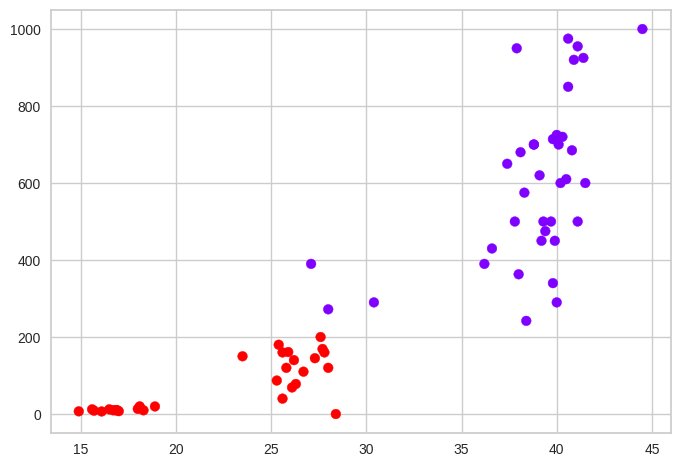

In [65]:
# c (color) is an argument which could be coded with a variable 
# The variable in this case has values 0,1,2,3 indicating to plt.scatter, that there are three colors (0,1,2,3)
# All points in cluster 0 will be the same colour, all points in cluster 1 - another one, etc.
# cmap is the color map. Rainbow is a nice one, but you can check others here: https://matplotlib.org/users/colormaps.html
plt.scatter(data_with_clusters['height'], data_with_clusters['weight'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.show()

Usiamo il metodo WCSS (within-cluster sum of squares) che è una misura sviluppata all'interno del framework ANOVA.

Questa misura dà una idea molto buona della distanza tra i diversi cluster e all'interno dei cluster, quindi permette di decidere il numero appropriato di cluster.

In [66]:
# Get the WCSS for the current solution
# WCCS or inertia is the sum of squared distances of samples to their closest cluster center.
kmeans.inertia_

137.06611791201334

Possiamo ri-eseguire il procedimento cercando di volta in volta un numero crescente di cluster:

In [67]:
wcss=[]

# Create all possible cluster solutions with a loop
for i in range(1,7):
    # Cluster solution with i clusters
    kmeans = KMeans(i, n_init=10)
    # Fit the data
    kmeans.fit(data_scaled)
    # Find WCSS for the current iteration
    wcss_iter = kmeans.inertia_
    # Append the value to the WCSS list
    wcss.append(wcss_iter)
    
wcss

[408.0,
 137.06611791201334,
 57.79216745234844,
 36.85040183287521,
 29.187980537651853,
 23.29323394316799]

Se plottiamo questi risultati, siamo in grado di vedere il risultato della misura WCSS in base al variare del numero di cluster:

In [68]:
number_clusters = range(1,7)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

Text(0, 0.5, 'Within-cluster Sum of Squares')

Il numero ottimale di cluster si trova nel punto in cui la linea di questo grafico effettua la deviazione più significativa. Come è possibile vedere questo valore, nel caso mostrato, si ha in corrispondenza di 3 cluster e quindi 3 è il numero ideale di cluster da creare.

Se non vogliamo procedere "ad occhio" con una valutazione qualitativa, possiamo usare una classe apposita per identificare il punto di maggior flessione:

In [69]:
from kneed import KneeLocator

n_clust = KneeLocator(number_clusters, wcss, curve='convex', direction='decreasing').knee # elbow is better

plt.plot(number_clusters, wcss)
plt.vlines(n_clust, np.nanmin(wcss), np.nanmax(wcss), color="red")
plt.xticks(sorted(set([n_clust])))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

Text(0, 0.5, 'Within-cluster Sum of Squares')

<a id='section12'></a>
### The silhouette method

L'approccio della silhouette, in breve, misura la qualità di un cluster, cioè determina quanto bene ogni oggetto si trova all'interno del suo cluster.

Il metodo della silhouette calcola un punteggio medio delle osservazioni per diversi valori di k. Il numero ottimale di cluster k è quello che massimizza la punteggio silhouette medio su una gamma di valori possibili per k (Kaufman e Rousseeuw 1990).

Il punteggio silhouette è calcolato considerando due misure:
1. La distanza media tra un campione e tutti gli altri punti nello stesso cluster.
2. La distanza media tra un campione e tutti gli altri punti nel cluster più vicino successivo.

In questo modo si controlla quanto i cluster sono compatti e ben separati tra loro. Più questo punteggio è vicino a uno, migliore è il clustering.

For n_clusters = 2 The average silhouette_score is : 0.5603510483124772
For n_clusters = 3 The average silhouette_score is : 0.5867271296448849
For n_clusters = 4 The average silhouette_score is : 0.5088454428542891
For n_clusters = 5 The average silhouette_score is : 0.48316352014285613
For n_clusters = 6 The average silhouette_score is : 0.44746314215366384


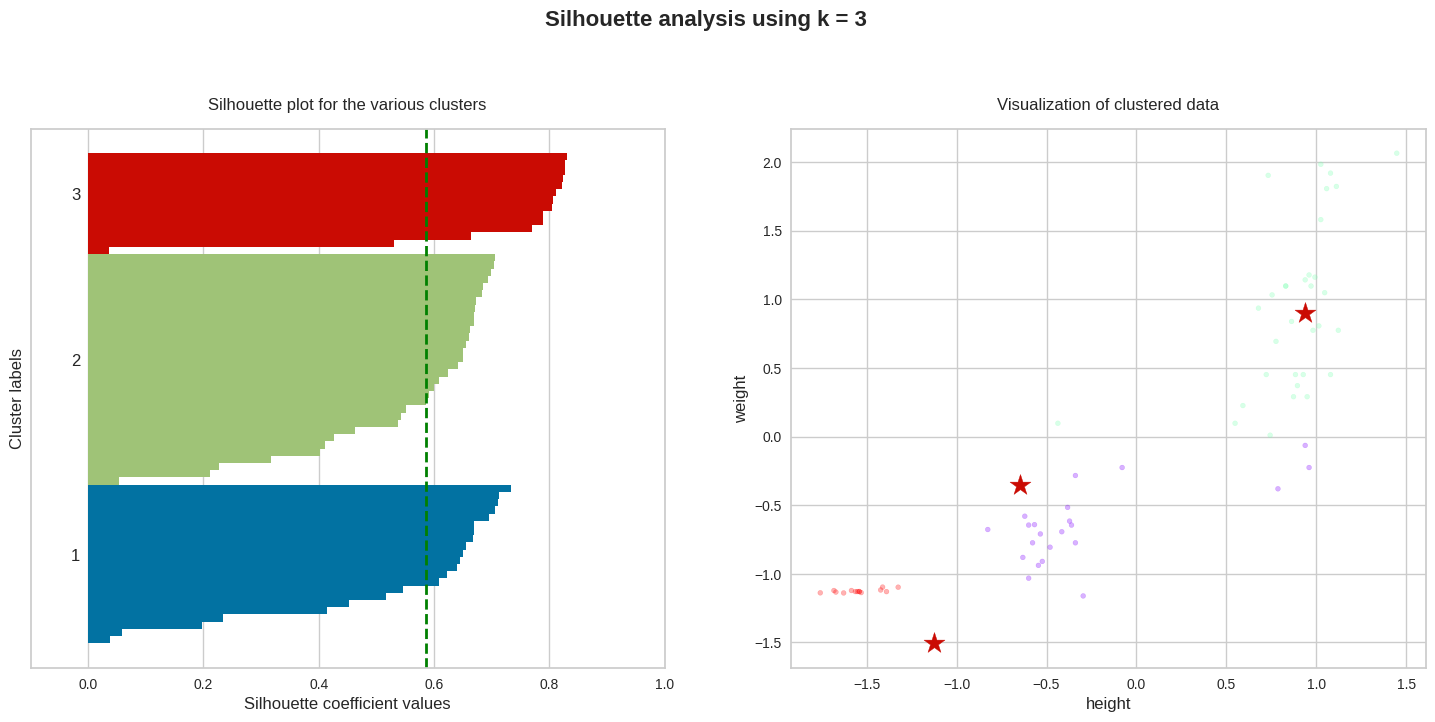

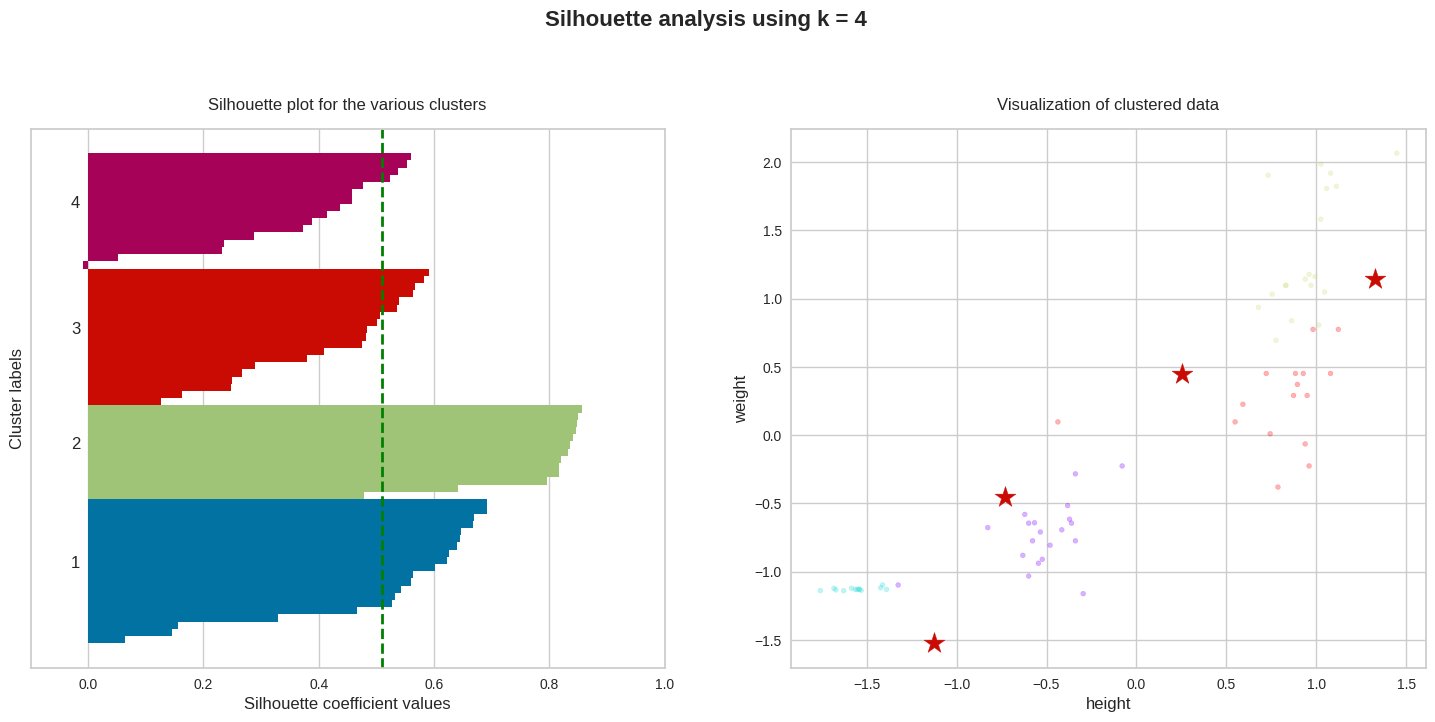

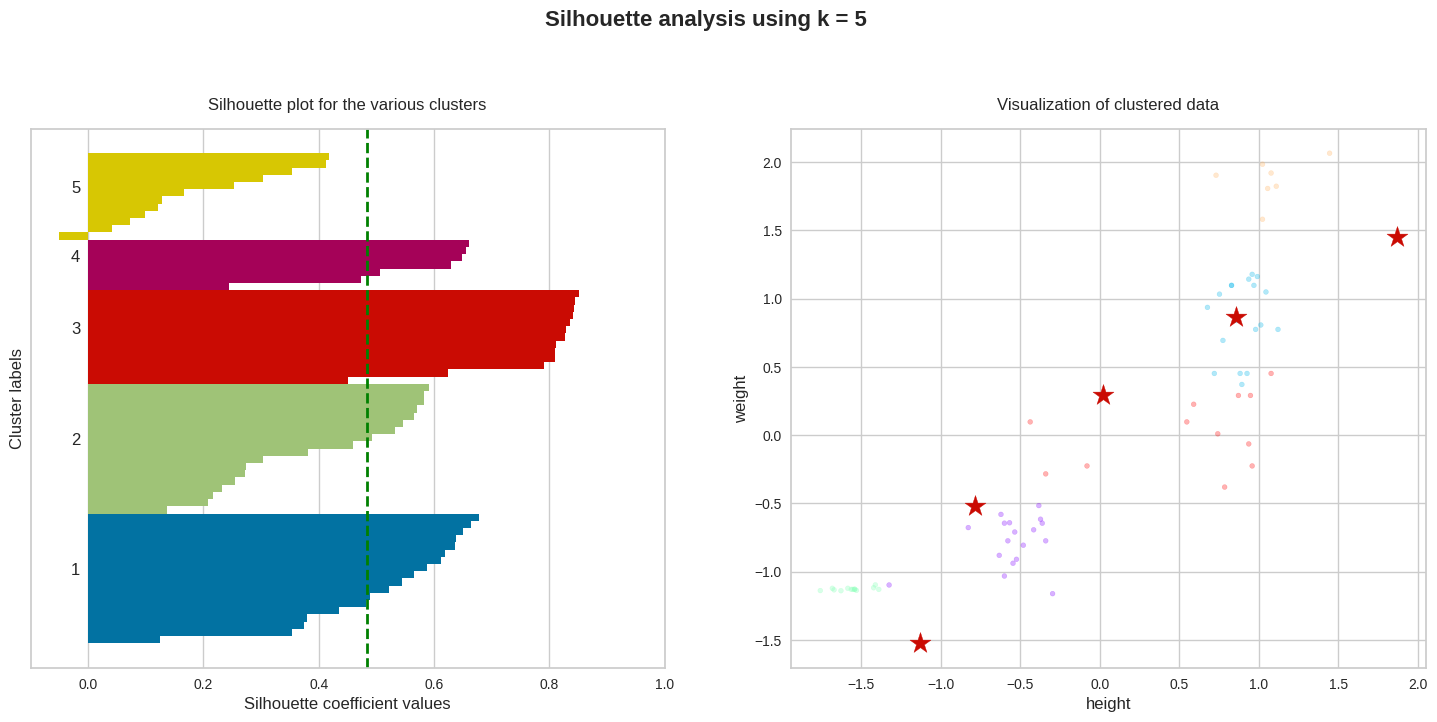

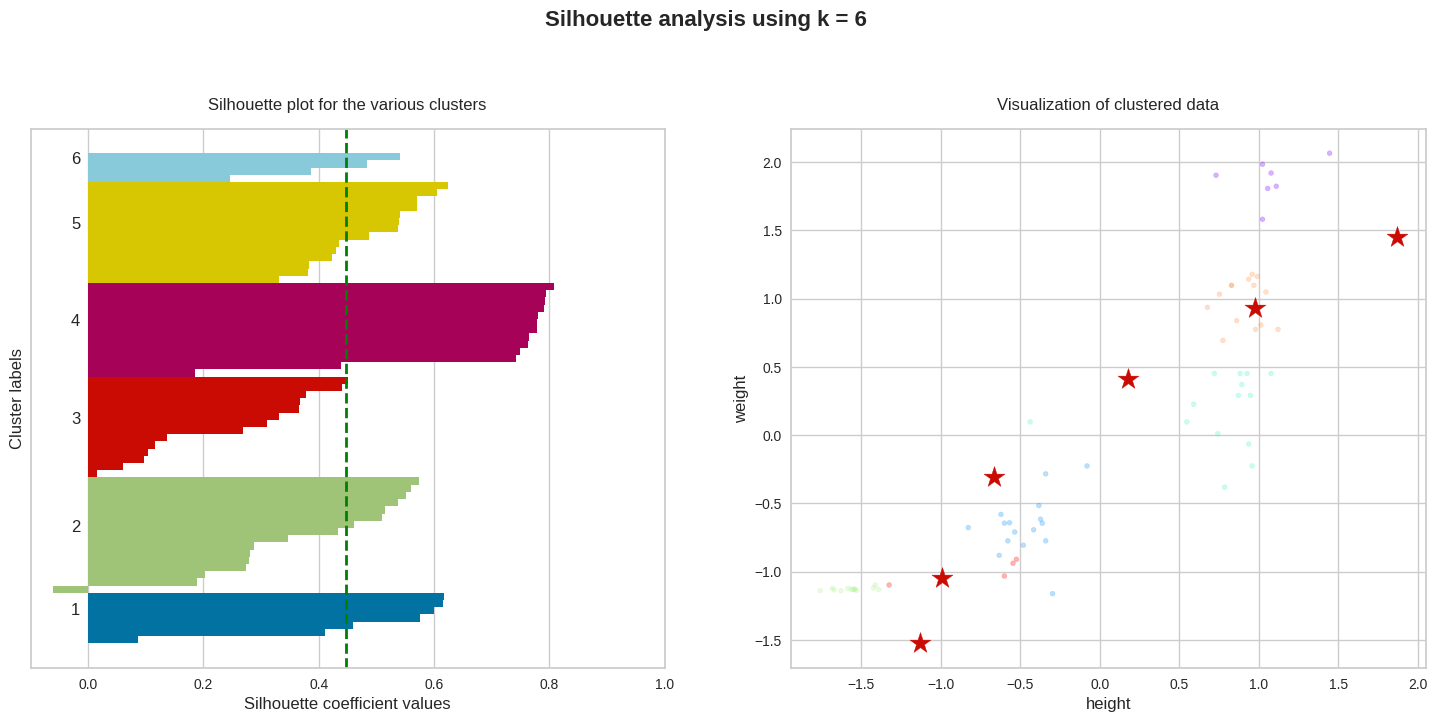

In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

range_clusters = enumerate([2, 3, 4, 5, 6])
for i, k in range_clusters :
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        km = KMeans(n_clusters=k, n_init=10)
        km_fit = km.fit(data_scaled)
        labels = km.predict(data_scaled)

        centroids = km.cluster_centers_
        
        # Get silhouette samples
        silhouette_vals = silhouette_samples(data_scaled, labels)

        # Silhouette plot
        y_ticks = []
        y_lower, y_upper = 0, 0

        for i, cluster in enumerate(np.unique(labels)):
            cluster_silhouette_vals = silhouette_vals[labels == cluster]
            cluster_silhouette_vals.sort()

            y_upper += len(cluster_silhouette_vals)
            ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
            ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
            y_lower += len(cluster_silhouette_vals)
            
        print("For n_clusters =", k, "The average silhouette_score is :", np.mean(silhouette_vals)) 

        # Get the average silhouette score and plot it
        avg_score = np.mean(silhouette_vals)
        ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
        ax1.set_yticks([])
        ax1.set_xlim([-0.1, 1])
        ax1.set_xlabel('Silhouette coefficient values')
        ax1.set_ylabel('Cluster labels')
        ax1.set_title('Silhouette plot for the various clusters', y=1.02);


        ax2.scatter(data_scaled['height'], data_scaled['weight'], marker='.', c=labels, cmap='rainbow', alpha=0.3) #print data
        ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250) #print centroids
        ax2.set_xlabel('height')
        ax2.set_ylabel('weight')
        ax2.set_title('Visualization of clustered data', y=1.02)
        plt.suptitle(f'Silhouette analysis using k = {k}', fontsize=16, fontweight='semibold', y=1.05);

Da questi grafici possiamo vedere che le soluzioni plausibili sono 3 o 4 cluster.
Questo perchè le silhouette dei dati, in questi casi, sono tali da superare il trashold del valore di silhouette medio e in questi cluster abbiamo una ripartizione degli elementi nei diversi cluster (visibili sull'altezza lungo l'asse y) più o meno equilibrata.

Tra questi prendiamo il valore 3 in quanto è ha un parametro di silhouette medio tra i più alti e permette una classificazione più o meno uniforme tra gli insiemi.

Usiamo altre librerie per effettuare la stessa valutazione di silhouette:

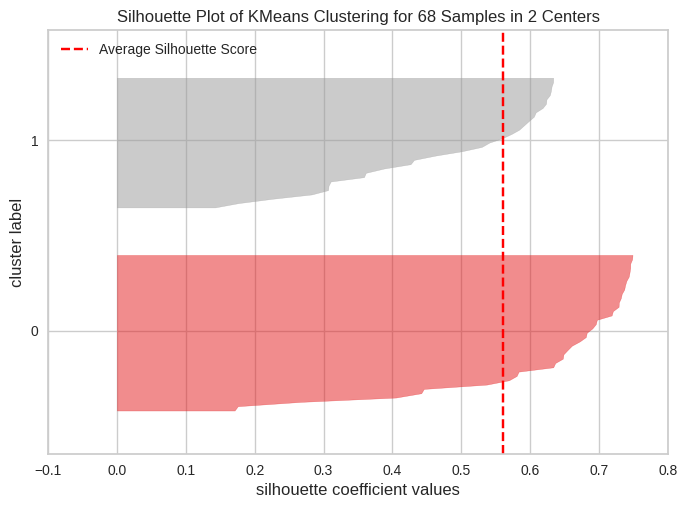

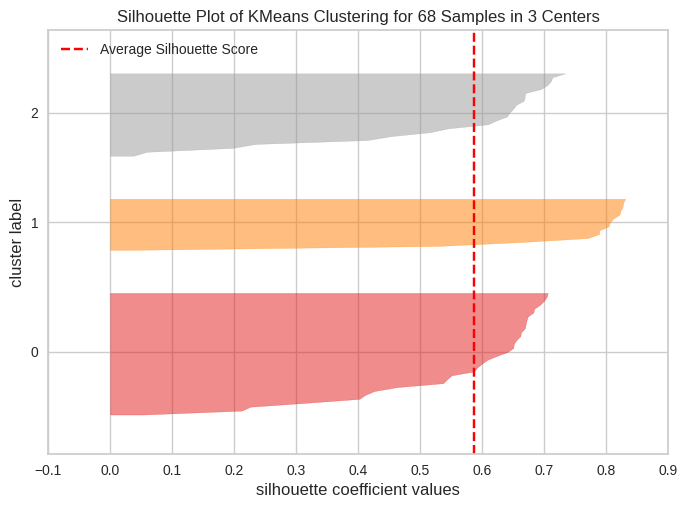

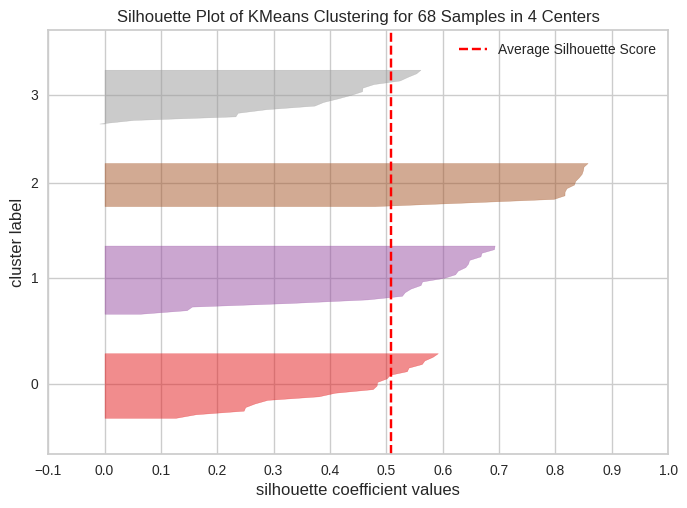

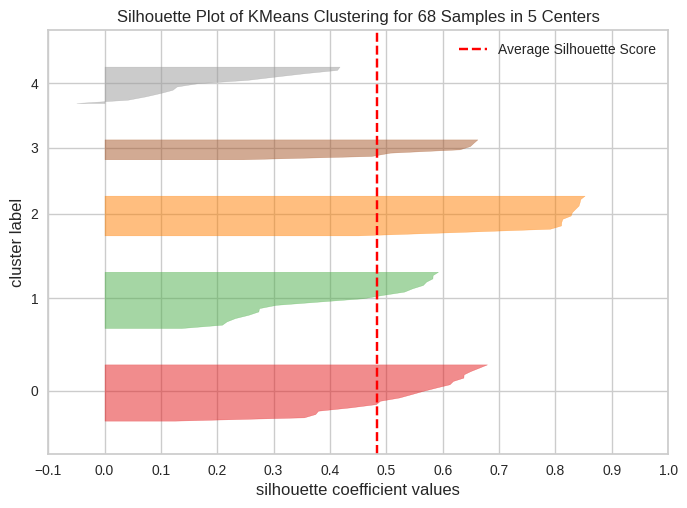

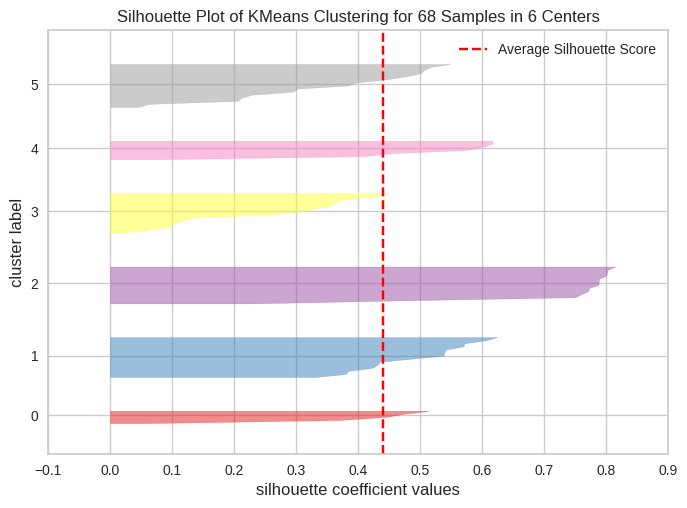

In [71]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    model = SilhouetteVisualizer(KMeans(n_clusters, n_init=10))
    model.fit(data_scaled)
    model.show()

<a id='section13'></a>
### Scegliere il numero di cluster

Per determinare il numero corretto di cluster da creare nei dati che abbiamo in ingresso? Per svolgere questo la procedura che si segue è la seguente:
- viene effattuata la clusterizzazione un un numero arbitrario di cluster
- si calcola una misura del risultato di clusterizzazione
- si incremente di uno il numero di cluster e si riesegue la sequenza

Dopo aver svolto un certo numero di clusterizzazioni, quindi, è possibile identificare la clusterizzazione "migliore" ovvero quella che ha prodotto il risultato matematicamente migliore.

Esistono diversi metodi per calcolare la qualità di una clusterizzazione. Vediamone alcuni:
1. inertia, questo metodo è stato uno dei primi usati per scegliere il numero di cluster, quando viene usato questo metodo si dice di star usando il "metodo del gomito" (elbow method) per scegliere il numero migliore di cluster.
1. Calinski Harabasz
1. Davies Bouldin
1. Silhouette

Vediamoli tutti e confrontiamoli tra loro:

In [72]:
import math
import sklearn.metrics as sklearn_metrics

def inertia_score(X, labels, model):
    centroids = model.cluster_centers_
    inertia = 0
    
    for i, label in enumerate(set(labels)):
        x_cluster = X[labels == label].to_numpy()
        distances = [math.dist(elem, centroids[i]) ** 2 for elem in x_cluster]
        inertia += np.sum(distances)
        
    return inertia

def calinski_harabasz_score(X, labels, model):
    if len(set(labels)) == 1:
        return float("NaN")
    else:
        return sklearn_metrics.calinski_harabasz_score(X, labels)

def davies_bouldin_score(X, labels, model):
    if len(set(labels)) == 1:
        return float("NaN")
    else:
        return sklearn_metrics.davies_bouldin_score(X, labels)

def silhouette_score(X, labels, model):
    if len(set(labels)) == 1:
        return float("NaN")
    else:
        return sklearn_metrics.silhouette_score(X, labels)

Proviamo a comparare i vari metodi in modo visuale facendoli lavorare tra 2 e 6 cluster possibili:

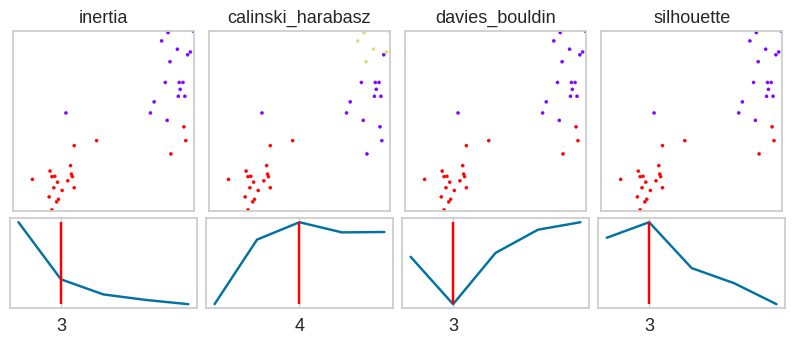

In [73]:
from kneed import KneeLocator

min_k, max_k = 2, 6
possible_k = np.arange(min_k, max_k + 1)

methods = ['inertia', 'calinski_harabasz', 'davies_bouldin', 'silhouette']

labels = {} 
scores = {}

for method in methods:
    scores[method] = []
    
for i in possible_k:
    model = KMeans(n_clusters=i, n_init=10).fit(data_scaled)
    labels[i] = model.labels_

    for method in methods:
        function = locals()[f'{method}_score']
        scores[method].append(function(data_scaled, model.labels_, model))

fig, axs = plt.subplots(2, 4, figsize=(10, 3.6), gridspec_kw={'height_ratios':[2,1]})
fig.subplots_adjust(wspace = .05, hspace=.05)

for enum, method in enumerate(methods):
    n_clust = 1
    
    if method == 'inertia':
        n_clust = KneeLocator(possible_k, scores[method], curve='convex', direction='decreasing').knee # elbow is better
    elif method == 'calinski_harabasz':
        n_clust = possible_k[np.nanargmax(scores[method])] # higher is better
    elif method == 'davies_bouldin':
        n_clust = possible_k[np.nanargmin(scores[method])] # lower is better
    elif method == 'silhouette':
        n_clust = possible_k[np.nanargmax(scores[method])] # higher is better
    
    axs[0,enum].scatter(data_scaled['height'], data_scaled['weight'], c=labels.get(n_clust), cmap='rainbow', s=5)
    axs[0,enum].set_aspect("equal", "box")
    axs[0,enum].set_title(f"{method}", fontsize=13)
    axs[0,enum].set_xticks([])
    axs[0,enum].set_yticks([])
    axs[0,enum].set_xlim(-1.05, 1.05)
    axs[0,enum].set_ylim(-1.05, 1.05)

    axs[1,enum].plot(range(min_k, max_k + 1), scores[method])
    axs[1,enum].vlines(n_clust, np.nanmin(scores[method]), np.nanmax(scores[method]), color="red")
    axs[1,enum].set_xlim(min_k - (max_k - min_k) * .05, max_k + (max_k - min_k) * .05)
    axs[1,enum].set_yticks([])
    axs[1,enum].set_xticks(sorted(set([n_clust])))
    axs[1,enum].tick_params(axis="both", which="major", labelsize=13)

    fig.show()

La maggior parte dei metodi convergono verso un numero di cluster pari a 3 tranne il Calinski Harabasz che suggerisce una clusterizzazione con 4 cluster.

<a id='section14'></a>
### Centroidi

Se rieseguiamo rapidamente il clustering con 3 cluster, possiamo ora passare a vedere un'altra importante feature.

In [74]:
kmeans = KMeans(3, n_init=10)
kmeans.fit(data_scaled)
identified_clusters = kmeans.fit_predict(data_scaled)
identified_clusters

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

Per ognuno dei 3 gruppi individuati possiamo trovare un punto che approssima l'intero gruppo, ovvero il punto che si trova a minor distanza da tutti i punti del gruppo e che chiamiamo centroide.

In [75]:
centroids = kmeans.cluster_centers_
centroids

array([[-0.64489124, -0.35464928, -0.35488786, -0.36549338, -0.29115486,
         0.54644604],
       [ 0.93575751,  0.90282699,  0.90387902,  0.91215191,  0.87497317,
         0.37840963],
       [-1.12547379, -1.50629853, -1.50832827, -1.51057191, -1.54240961,
        -1.72363722]])

Dato un cluster, ogni oggetto è vicino (più simile) al prototipo che definisce il cluster, rispetto al prototipo di ogni altro cluster.
Per gli attributi continui, il prototipo di un cluster è solitamente il **centroide**, cioè la media di tutti gli oggetti in un cluster.
Quando il centroide non è rappresentativo (categorical attributes) si utilizza invece il **medoide** (il più rappresentativo oggetto all'interno del cluster).

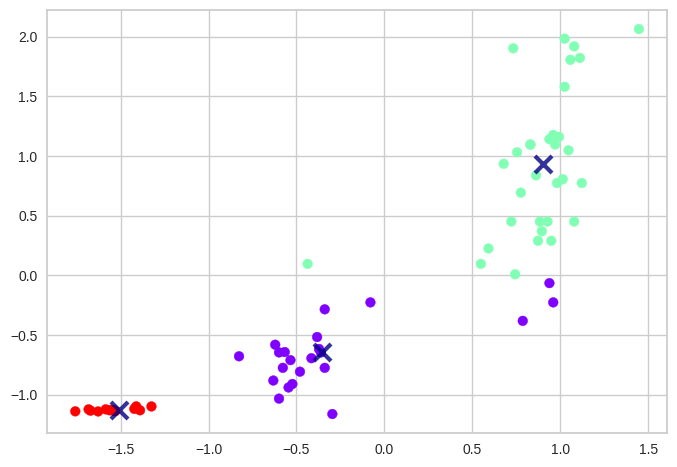

In [76]:
plt.scatter(data_scaled['height'], data_scaled['weight'], c=identified_clusters, cmap='rainbow')
plt.scatter(centroids[:,1], centroids[:,0], marker='x', c='navy', alpha=0.8, linewidths=3, s=150)
plt.show()

<a id='section20'></a>
## Hierarchical Clustering

Come suggerisce il nome, il clustering gerarchico è un algoritmo che costruisce una gerarchia di cluster. Questo algoritmo inizia con tutti i dati assegnati a un cluster, quindi i due cluster più vicini vengono uniti nello stesso cluster. L'algoritmo termina quando rimane un solo cluster.

Il completamento del clustering gerarchico può essere mostrato utilizzando il dendrogramma. Ora diamo un'occhiata a un esempio di clustering gerarchico utilizzando i dati granulari. Il set di dati può essere trovato qui.

In [77]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd

# Reading the DataFrame
seeds_df = pd.read_csv('data/seeds-less-rows.csv')

# Remove the grain species from the DataFrame, save for later
varieties = list(seeds_df.pop('grain_variety'))

samples = seeds_df.values
samples

array([[14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ],
       [14.69  , 14.49  ,  0.8799,  5.563 ,  3.259 ,  3.586 ,  5.219 ],
       [14.03  , 14.16  ,  0.8796,  5.438 ,  3.201 ,  1.717 ,  5.001 ],
       [13.99  , 13.83  ,  0.9183,  5.119 ,  3.383 ,  5.234 ,  4.781 ],
       [14.11  , 14.26  ,  0.8722,  5.52  ,  3.168 ,  2.688 ,  5.219 ],
       [13.02  , 13.76  ,  0.8641,  5.395 ,  3.026 ,  3.373 ,  4.825 ],
       [15.49  , 14.94  ,  0.8724,  5.757 ,  3.371 ,  3.412 ,  5.228 ],
       [16.2   , 15.27  ,  0.8734,  5.826 ,  3.464 ,  2.823 ,  5.527 ],
       [13.5   , 13.85  ,  0.8852,  5.351 ,  3.158 ,  2.249 ,  5.176 ],
       [15.36  , 14.76  ,  0.8861,  5.701 ,  3.393 ,  1.367 ,  5.132 ],
       [15.78  , 14.91  ,  0.8923,  5.674 ,  3.434 ,  5.593 ,  5.136 ],
       [14.46  , 14.35  ,  0.8818,  5.388 ,  3.377 ,  2.802 ,  5.044 ],
       [11.23  , 12.63  ,  0.884 ,  4.902 ,  2.879 ,  2.269 ,  4.703 ],
       [14.34  , 14.37  ,  0.8726,  5.63  ,  3.19  ,  1.313 ,  5

Eseguire il clustering gerarchico sui campioni utilizzando il file linkage() con l'argomento della parola chiave method='complete'.

Assegna il risultato alle fusioni.

In [78]:
mergings = linkage(samples, method='complete')

Traccia un dendrogramma utilizzando la funzione dendrogram() sulle fusioni, specificando gli argomenti della parola chiave labels=varieties, leaf_rotation=90, e leaf_font_size=6.

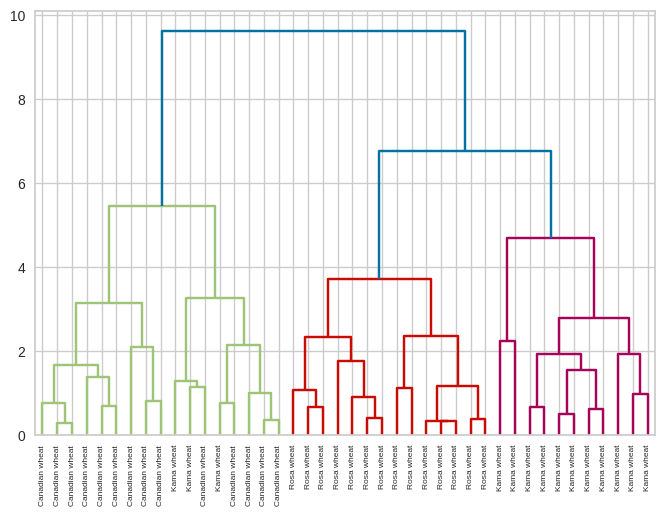

In [79]:
dendrogram(mergings, labels=varieties, leaf_font_size=6)
plt.show()

Differenze tra K-Means e clustering e gerarchico:

- Il clustering gerarchico non è in grado di gestire molto bene i big data, ma il clustering k-significa sì. Questo perché la complessità temporale delle k-medie è lineare, cioè O(n), mentre quella del raggruppamento gerarchico è quadratica, cioè O(n2).
- Il clustering K-means inizia con una scelta arbitraria di cluster e i risultati generati eseguendo l'algoritmo più volte potrebbero differire. I risultati sono riproducibili nel clustering gerarchico.
- K-mean funziona bene quando la forma degli ammassi è ipersferica (come un cerchio in 2D o una sfera in 3D).
- K-means non consente dati rumorosi, mentre il clustering gerarchico può utilizzare direttamente il set di dati rumoroso per il clustering.

<a id='section2'></a>
## DBScan

Il Density-Based Spatial Clustering of Applications with Noise (brevemente DBSCAN) è un algoritmo di clustering che, a differenza del K-means (come suggerisce il "density-based") tiene conto delle differenze di densità tra le osservazioni nello spazio delle feature.

In [80]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons

X1, X2 = make_moons(n_samples=500, noise=0.1)
df = pd.DataFrame(X1, X2)
df = df.rename(columns={0: "X1", 1: "X2"})
df.head()

X1        X2
1  1.821856  0.194378
1  1.584150 -0.032510
1  0.083426  0.221311
1  1.366369 -0.583834
1  1.871122 -0.136206

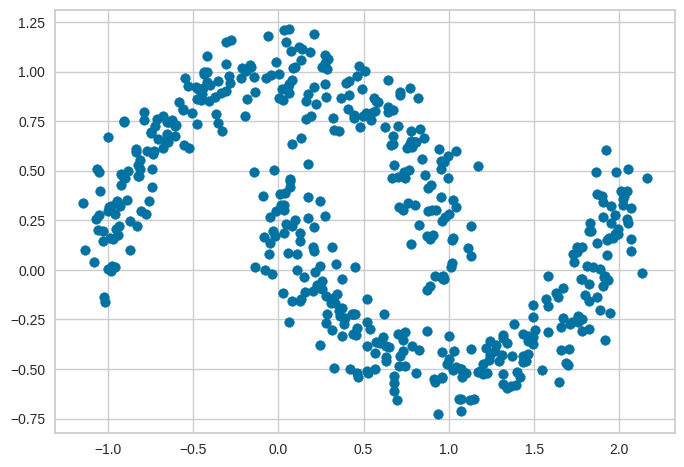

In [81]:
import matplotlib.pyplot as plt

plt.scatter(df['X1'], df['X2'])

Proviamo a usare K-Means a identificare il numero di cluster da creare:

Text(0, 0.5, 'Within-cluster Sum of Squares')

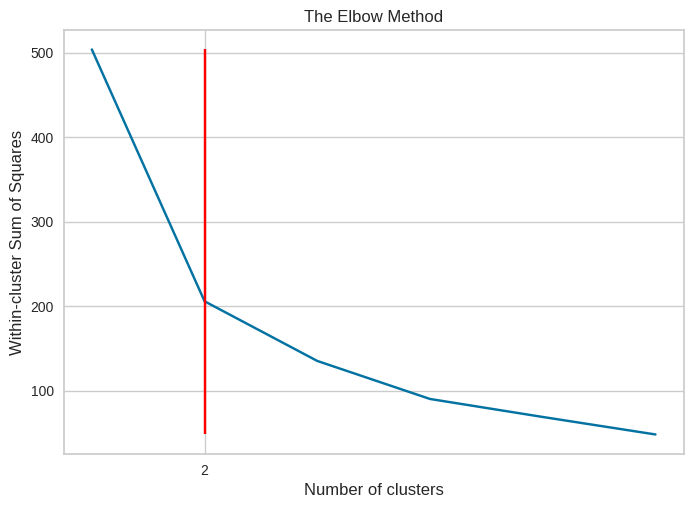

In [82]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
import matplotlib.pyplot as plt
wcss=[]

# Create all possible cluster solutions with a loop
for i in range(1,7):
    # Cluster solution with i clusters
    kmeans = KMeans(i, n_init=10)
    # Fit the data
    kmeans.fit(df)
    # Find WCSS for the current iteration
    wcss_iter = kmeans.inertia_
    # Append the value to the WCSS list
    wcss.append(wcss_iter)
    
number_clusters = range(1,7)
n_clust = KneeLocator(number_clusters, wcss, curve='convex', direction='decreasing').knee # elbow is better

plt.plot(number_clusters, wcss)
plt.vlines(n_clust, np.nanmin(wcss), np.nanmax(wcss), color="red")
plt.xticks(sorted(set([n_clust])))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

Proviamo a proseguir eocn la creazione di 2 cluster che, dato lo scatter e il grafico dell'elbow method, ci sembra un valore sensato:

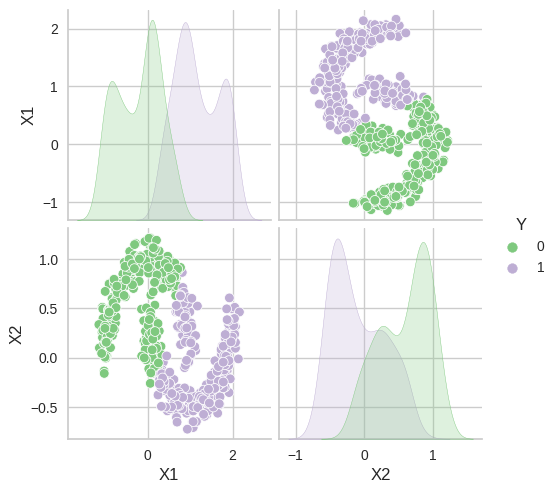

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

kmeans = KMeans(2, n_init=10)
kmeans.fit(df)

df['Y'] = kmeans.fit_predict(df)

sns.pairplot(df, hue="Y", palette="Accent")

Vediamo ora i risultati che si ottengono con DBScan:

In [84]:
df.drop('Y', axis=1, inplace=True)

Estimated no. of clusters: 1
Estimated no. of noise points: 0


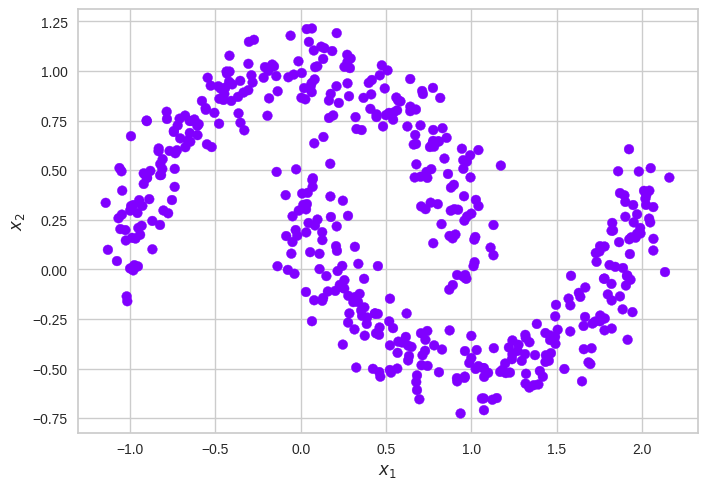

In [85]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import v_measure_score
import seaborn as sns

dbscan_cluster = DBSCAN()
dbscan_cluster.fit(df)

# Visualizing DBSCAN
plt.scatter(df['X1'], df['X2'], c=dbscan_cluster.labels_, cmap='rainbow')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

Per far convergere meglio DBSCAN dovremmo scegliere i valori dei parametri della funzione DBSCAN() come eps=0.1 e min_samples=8. Potremmo sceglierli arbitrariamente questi valori e andare per tentativi, ma possiamo utilizzare il metodo di rilevamento del punto del gomito per arrivare a un valore adeguato di epsilon.

In questo approccio, viene calcolata la distanza media tra ciascun punto e i suoi k vicini più vicini. Tracciamo quindi le k distanze medie in ordine crescente su un grafico delle k distanze.

Il valore ottimale per epsilon è il punto con la massima curvatura o piega, cioè alla massima pendenza.

0.1686829092776741


<Figure size 500x500 with 0 Axes>

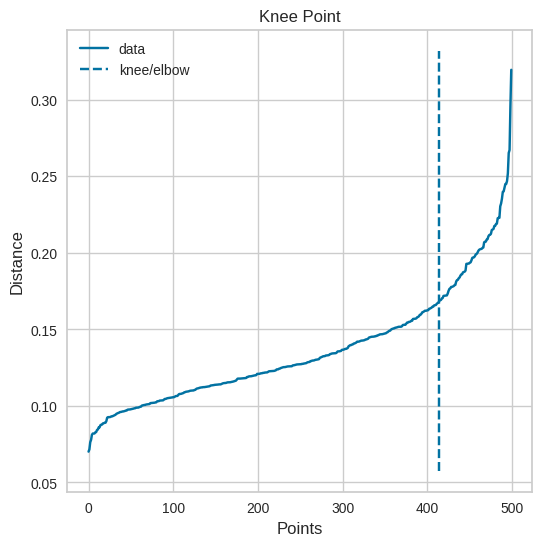

In [86]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(df)

distances, indices = neighbors.kneighbors(df)
distances = np.sort(distances[:,10], axis=0)

from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

eps = distances[knee.knee]
print(eps)

Estimated no. of clusters: 2
Estimated no. of noise points: 3


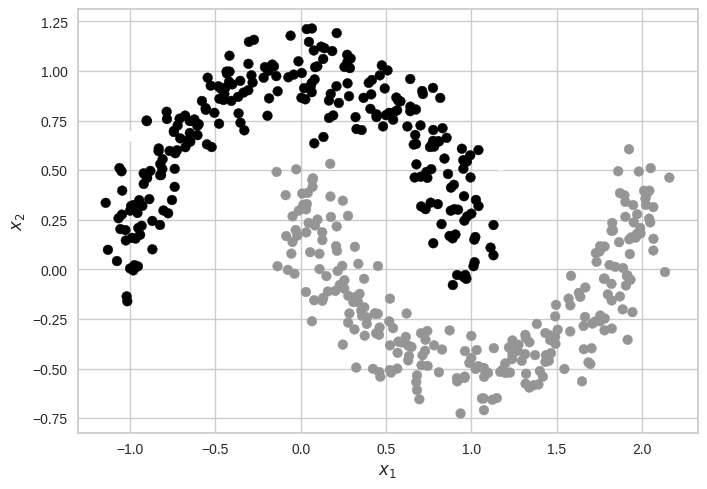

In [87]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import v_measure_score
import seaborn as sns

dbscan_cluster = DBSCAN(eps=eps, min_samples=10)
dbscan_cluster.fit(df)
labels=dbscan_cluster.labels_

# Visualizing DBSCAN
plt.scatter(df['X1'], df['X2'], c=dbscan_cluster.labels_, label=labels)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Number of Clusters
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

<a id='section3'></a>
## Anomaly detection

Come è possibile vedere, il DBSCAN è un metodo che, effettuando una clusterizzazione, è in grado di identificare dei _noise point_, ovvero dei punti che non è possibile clusterizzare in nessuno dei cluster che si sta identificando.

Questa tecnica può essere quindi vista come una possibile tecnica di identificazione delle anomalie. I punti non clusterizzati, infatti, rappresentano delle anomalie nei dataset considerati.

Vediamo però altri algoritmi con coi fare identificazione delle anomalie. Il rilevamento delle anomalie noto anche come rilevamento dei valori anomali è il processo di ricerca di punti dati all'interno di un set di dati diverso dal resto. Le applicazioni comuni del rilevamento delle anomalie includono il rilevamento delle frodi nelle transazioni finanziarie, il rilevamento dei guasti e la manutenzione predittiva.

In generale, il rilevamento delle anomalie può essere descritto come un problema supervisionato o non supervisionato:
- Il rilevamento supervisionato delle anomalie richiede un set di dati etichettato che indichi se un record è "normale" o "anormale".
- Il rilevamento di anomalie senza supervisione implica un set di dati senza etichetta. Presuppone che la maggior parte dei punti dati nel set di dati senza etichetta siano "normali" e cerca punti dati che differiscono dai punti dati "normali".

Nel seguito vediamo come rilevare le anomalie con le libreria di sklearn.

In [1]:
from sklearn.datasets import load_breast_cancer

df = load_breast_cancer(as_frame=True)['data']

In [2]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(max_samples='auto', contamination=0.01)
clf.fit(df)
df['Anomaly IF'] = clf.predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [3]:
from sklearn.neighbors import LocalOutlierFactor
lf = LocalOutlierFactor(n_neighbors=10)
clf.fit(df)
df['Anomaly LOF'] = clf.predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [4]:
df[df['Anomaly IF'] != df['Anomaly LOF']]

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
3          11.42         20.38           77.58      386.1           0.1425   
108        22.27         19.67          152.80     1509.0           0.1326   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
3              0.2839          0.2414               0.1052         0.2597   
108            0.2768          0.4264               0.1823         0.2556   

     mean fractal dimension  ...  worst perimeter  worst area  \
3                   0.09744  ...            98.87       567.7   
108                 0.07039  ...           206.80      2360.0   

     worst smoothness  worst compactness  worst concavity  \
3              0.2098             0.8663           0.6869   
108            0.1701             0.6997           0.9608   

     worst concave points  worst symmetry  worst fractal dimension  \
3                  0.2575          0.6638                  0.17300   
108                0.2910          0.4055                  0.09789   

     Anomaly IF  Anomaly LOF  
3             1           -1  
108          -1            1  

[2 rows x 32 columns]

In [5]:
anomalies = df[(df['Anomaly IF'] == -1) | (df['Anomaly LOF'] == -1)]
anomalies

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
3         11.420         20.38           77.58      386.1           0.1425   
78        20.180         23.97          143.70     1245.0           0.1286   
108       22.270         19.67          152.80     1509.0           0.1326   
122       24.250         20.20          166.20     1761.0           0.1447   
152        9.731         15.34           63.78      300.2           0.1072   
212       28.110         18.47          188.50     2499.0           0.1142   
461       27.420         26.27          186.90     2501.0           0.1084   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
3              0.2839          0.2414              0.10520         0.2597   
78             0.3454          0.3754              0.16040         0.2906   
108            0.2768          0.4264              0.18230         0.2556   
122            0.2867          0.4268              0.20120         0.2655   
152            0.1599          0.4108              0.07857         0.2548   
212            0.1516          0.3201              0.15950         0.1648   
461            0.1988          0.3635              0.16890         0.2061   

     mean fractal dimension  ...  worst perimeter  worst area  \
3                   0.09744  ...            98.87       567.7   
78                  0.08142  ...           170.30      1623.0   
108                 0.07039  ...           206.80      2360.0   
122                 0.06877  ...           180.90      2073.0   
152                 0.09296  ...            71.04       380.5   
212                 0.05525  ...           188.50      2499.0   
461                 0.05623  ...           251.20      4254.0   

     worst smoothness  worst compactness  worst concavity  \
3              0.2098             0.8663           0.6869   
78             0.1639             0.6164           0.7681   
108            0.1701             0.6997           0.9608   
122            0.1696             0.4244           0.5803   
152            0.1292             0.2772           0.8216   
212            0.1142             0.1516           0.3201   
461            0.1357             0.4256           0.6833   

     worst concave points  worst symmetry  worst fractal dimension  \
3                  0.2575          0.6638                  0.17300   
78                 0.2508          0.5440                  0.09964   
108                0.2910          0.4055                  0.09789   
122                0.2248          0.3222                  0.08009   
152                0.1571          0.3108                  0.12590   
212                0.1595          0.1648                  0.05525   
461                0.2625          0.2641                  0.07427   

     Anomaly IF  Anomaly LOF  
3             1           -1  
78           -1           -1  
108          -1            1  
122          -1           -1  
152          -1           -1  
212          -1           -1  
461          -1           -1  

[7 rows x 32 columns]

In [6]:
import plotly.graph_objects as go

b1 = go.Scatter(x=df['mean radius'],
                y=df['mean area'],
                name="Dataset",
                mode='markers'
               )
b2 = go.Scatter(x=anomalies['mean radius'],
                y=anomalies['mean area'],
                name="Anomalies",
                mode='markers',
                marker=dict(color='red', size=6,
                            line=dict(color='red', width=1))
               )

layout = go.Layout(
    title="Isolation Forest results",
    yaxis_title='Mean radius',
    xaxis_title='Mean area',
    hovermode='closest'
)

data = [b1, b2]

fig = go.Figure(data=data, layout=layout)
fig.show()

[Clicca qui per tornare all'inizio della pagina](#start)<a id='start'></a>